In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTEN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [83]:
from main import clean_text

Loading tweets data set

In [84]:
tweet_data = pd.read_csv("~/Downloads/tweets.csv")
tweet_data.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


checking for missing values

In [85]:
tweet_data.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

dropping columns with missing values

In [86]:
new_data=tweet_data.dropna()

In [87]:
new_data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


Performing feature engineering by dropping irrelevant columns

In [88]:
tweets_data1 = new_data.drop(columns=['textID'])
tweets_data1

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,But it was worth it ****.,But it was worth it ****.,positive


checking for the unique values in the sentiment column

In [89]:
tweets_data1['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

Getting the length of each sentence

In [90]:
tweets_data1['length'] = tweets_data1['text'].apply(lambda X: len(str(X).split(' ')))

Graphic representation of the sentence

Text(0, 0.5, 'length')

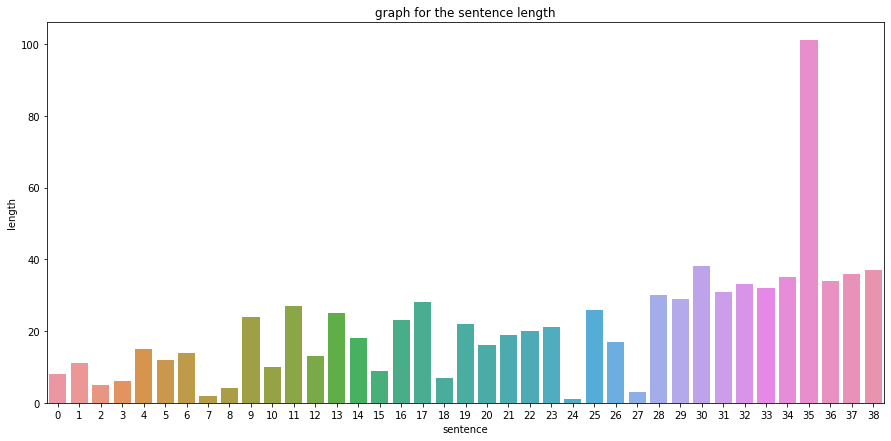

In [91]:
plt.figure(figsize=(15, 7))
unique_lengths = tweets_data1['length'].unique()
sns.barplot(np.arange(len(unique_lengths)), unique_lengths)
plt.title("graph for the sentence length")
plt.xlabel("sentence")
plt.ylabel("length")

Checking for unique words among the sentence

In [92]:
tweets_data1['text'].unique()

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype=object)

Getting the array of the words

In [93]:
tweets_data1['length'].unique()

array([  8,  11,   5,   6,  15,  12,  14,   2,   4,  24,  10,  27,  13,
        25,  18,   9,  23,  28,   7,  22,  16,  19,  20,  21,   1,  26,
        17,   3,  30,  29,  38,  31,  33,  32,  35, 101,  34,  36,  37])

plot of the sentiment

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64



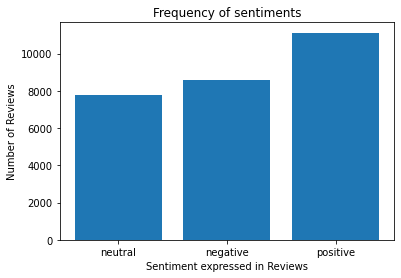

In [94]:
Index = [2, 1, 0]

print(tweets_data1["sentiment"].value_counts())
print()

barlist = plt.bar(Index, tweets_data1["sentiment"].value_counts())

plt.title("Frequency of sentiments")
plt.xticks(Index, ['positive', 'negative', 'neutral'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

plt.show()


Application of clean text for bags

In [95]:
tweets_data1['selected_text'] = tweets_data1['text'].apply(clean_text)

In [96]:
tweets_data1

,text,selected_text,sentiment,length
0,"I`d have responded, if I were going",i d have responded if i were going,neutral,8
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego,negative,11
2,my boss is bullying me...,my bos is bullying me,negative,5
3,what interview! leave me alone,what interview leave me alone,negative,6
4,"Sons of ****, why couldn`t they put them on t...",son of why couldn t they put them on the relea...,negative,15
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,wish we could come see u on denver husband los...,negative,18
27477,I`ve wondered about rake to. The client has ...,i ve wondered about rake to the client ha made...,negative,26
27478,Yay good for both of you. Enjoy the break - y...,yay good for both of you enjoy the break you p...,positive,24
27479,But it was worth it ****.,but it wa worth it,positive,8


Visualizing the most frequent words used in the review

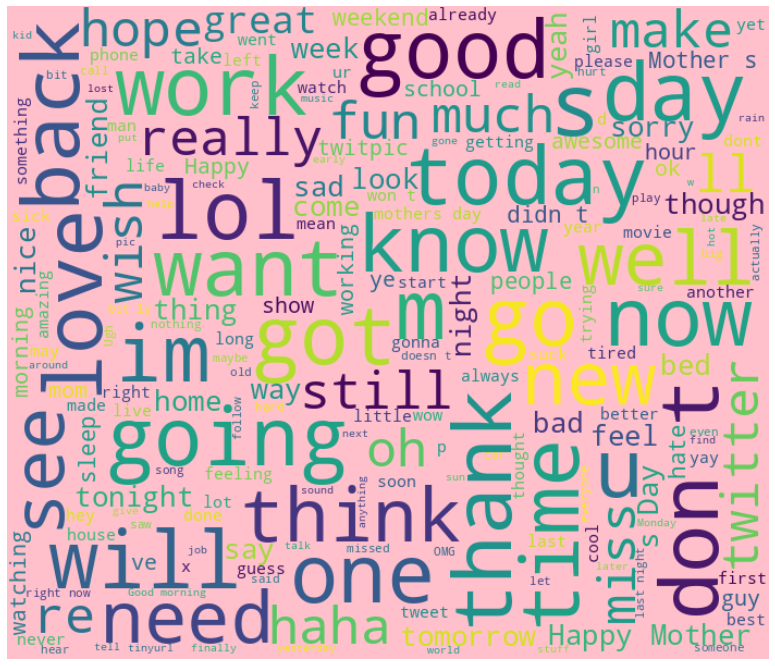

In [97]:
word = " ".join([text for text in tweets_data1['text']])

rainy_word = WordCloud(width = 700, height = 600, random_state = 90, max_font_size= 80, stopwords= STOPWORDS, normalize_plurals=True, collocations=True, relative_scaling=.10, background_color= "pink").generate(word)

plt.figure(figsize= (16, 12))
plt.imshow(rainy_word, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [98]:
# from nltk.corpus import stopwords
#
# stopword = set(stopwords)
# stopword.update(["p", "yay", "s", "n", "p", "w", "x", "ve", "d", "s"])

In [99]:
x = tweets_data1.drop(columns = ['sentiment'])
y = tweets_data1['sentiment']

In [100]:
sampling_tweet = SMOTEN(random_state=0)
x2, y2 = sampling_tweet.fit_resample(x, y)

In [101]:
X = x2['selected_text']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20, random_state=42)

In [103]:
y_train.shape

(26680,)

In [125]:
make_pipeline = Pipeline([('bags of gold', TfidfVectorizer(stop_words='english')),
                          ('classification', SVC(kernel="linear"))])

In [126]:
model1 = make_pipeline.fit(X_train, y_train)

In [127]:
y_predict1 = make_pipeline.predict(X_test)

In [128]:
confusion_matrix(y_test, y_predict1)

array([[1679,  556,   81],
       [ 270, 1645,  262],
       [  60,  364, 1754]])

In [129]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

    negative       0.84      0.72      0.78      2316
     neutral       0.64      0.76      0.69      2177
    positive       0.84      0.81      0.82      2178

    accuracy                           0.76      6671
   macro avg       0.77      0.76      0.76      6671
weighted avg       0.77      0.76      0.76      6671

